# Basic Usage

## 1) Imports and synthetic dataset

We import NumPy and helper utilities from ANFIS-Toolbox, then generate a simple noisy sine dataset for regression:
- Inputs `X` are evenly spaced in [-π, π].
- Targets `y` follow `sin(x)` with Gaussian noise.
This small problem is ideal to showcase ANFIS function approximation.

In [18]:
import numpy as np


np.random.seed(42)  # For reproducibility

n = 200
X = np.linspace(-np.pi, np.pi, n).reshape(-1, 1)
y = np.sin(X[:, 0]) + 0.2 * np.random.randn(n)
y = y.reshape(-1, 1)

## 2) Build, train, and evaluate ANFIS
We create a quick ANFIS model for regression using Gaussian membership functions. Then we:
- train with the default Hybrid trainer via `fit`,
- compute metrics with `quick_evaluate`, and
- keep the loss history to inspect training behavior.

In [19]:
from anfis_toolbox import QuickANFIS, quick_evaluate

# Build ANFIS model with Gaussian MFs (FCM init for centers)
model = QuickANFIS.for_regression(X, random_state=42)
losses = model.fit(X, y)
metrics = quick_evaluate(model, X, y)

ANFIS Model Evaluation Results
Mean Squared Error (MSE):     0.033254
Root Mean Squared Error:      0.182356
Mean Absolute Error (MAE):    0.145541
R-squared (R²):               0.9402
Mean Abs. Percentage Error:   61.73%
Maximum Error:                0.543382
Standard Deviation of Error:  0.182356


## 3) Quick visualization with Matplotlib
We compare the ground truth samples against the ANFIS prediction curve:
- The scatter shows noisy `y` values.
- The line is the model’s prediction `y_pred = model.predict(X)`.
This gives a fast sense of fit quality.

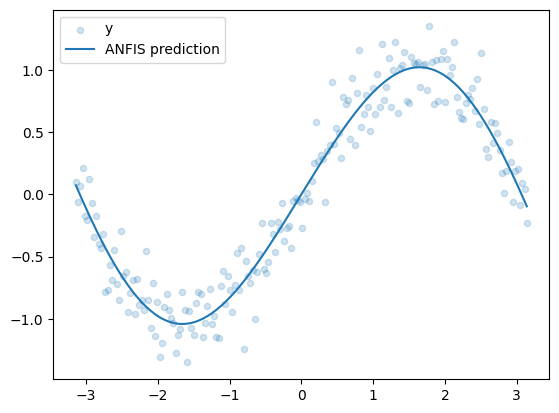

In [20]:
import matplotlib.pyplot as plt


y_pred = model.predict(X)

plt.scatter(X, y, s=20, alpha=0.2, label="y")
plt.plot(X, y_pred, label="ANFIS prediction")
plt.legend()
plt.show()